## Question-1:
 Implement the greedy algorithm for the densest subgraph. Run your algorithm on the linked dataset . Re
port the density of the component extracted, as well as the histogram of the page categories in the densest
 subgraph. Also report the overall histogram of page categories and comment on how similar/different the
 two histograms are. Also compare its density with the density of the whole graph

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("facebook_large\musae_facebook_target.csv")
display(df)

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company


In [3]:
print(df.dtypes)

id              int64
facebook_id     int64
page_name      object
page_type      object
dtype: object


In [4]:
df_edges=pd.read_csv("facebook_large\musae_facebook_edges.csv")
display(df_edges)

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


In [7]:
import heapq

# graph (adjacency list) and degree dictionary

edges = df_edges[["id_1", "id_2"]].to_numpy()
graph = {}
degree = {}

for id1, id2 in edges:
    if id1 not in graph:
        graph[id1]= set()
        degree[id1] = 0
    if id2 not in graph:
        graph[id2] = set()
        degree[id2] = 0

    graph[id1].add(id2)
    graph[id2].add(id1)
    
    degree[id1] += 1
    degree[id2] += 1


# Convert degree dictionary to a min-heap
min_degree_heap = [(deg, node) for node, deg in degree.items()]
heapq.heapify(min_degree_heap)

num_nodes = len(graph)
num_edges = sum(len(neighbors) for neighbors in graph.values()) // 2
max_density = num_edges / num_nodes
best_subgraph = graph.copy()  
print("density of whole graph: ",max_density)
while graph:
    
    while min_degree_heap and (min_degree_heap[0][1] not in degree or min_degree_heap[0][0] != degree[min_degree_heap[0][1]]):
        heapq.heappop(min_degree_heap) 

    if not min_degree_heap:
        break

    min_deg, min_node = heapq.heappop(min_degree_heap)
 

    # Remove the node and update its neighbors
    for neighbor in list(graph[min_node]):  
        if neighbor in degree:
            degree[neighbor] -= 1
            graph[neighbor].remove(min_node)  # Remove the edge
            heapq.heappush(min_degree_heap, (degree[neighbor], neighbor))  # Update heap

    del graph[min_node]
    del degree[min_node]

    # Update node and edge count
    num_nodes -= 1
    num_edges -= min_deg

    if num_nodes > 0:  # Avoid division by zero
        density = num_edges / num_nodes
        if density > max_density:
            max_density = density
            best_subgraph = graph.copy()


print("Max Density:", max_density)
print("No. of Nodes in Densest Subgraph:", len(best_subgraph))


density of whole graph:  7.606230529595016
Max Density: 34.196374622356494
No. of Nodes in Densest Subgraph: 331


Observation: Density of densest subgraph is almost 5 times the density of whole graph

In [8]:
print(best_subgraph)

{np.int64(22265): {np.int64(9220), np.int64(18966), np.int64(9319), np.int64(14497), np.int64(8883), np.int64(6441), np.int64(7467), np.int64(9525), np.int64(5432), np.int64(15174), np.int64(5458), np.int64(1387), np.int64(15236), np.int64(4502), np.int64(20892), np.int64(6045), np.int64(961), np.int64(8139), np.int64(17402), np.int64(16895)}, np.int64(10379): {np.int64(4097), np.int64(14497), np.int64(10426), np.int64(2245), np.int64(20700), np.int64(2284), np.int64(6441), np.int64(4399), np.int64(16791), np.int64(16977), np.int64(14996), np.int64(15096), np.int64(15174), np.int64(2942), np.int64(19347), np.int64(3073), np.int64(9220), np.int64(3097), np.int64(11364), np.int64(11432), np.int64(21729), np.int64(1271), np.int64(11538), np.int64(19743), np.int64(7467), np.int64(5432), np.int64(5458), np.int64(1387), np.int64(19870), np.int64(11775), np.int64(11804), np.int64(1654), np.int64(3805), np.int64(16093), np.int64(22265), np.int64(16122), np.int64(18216), np.int64(12088), np.int

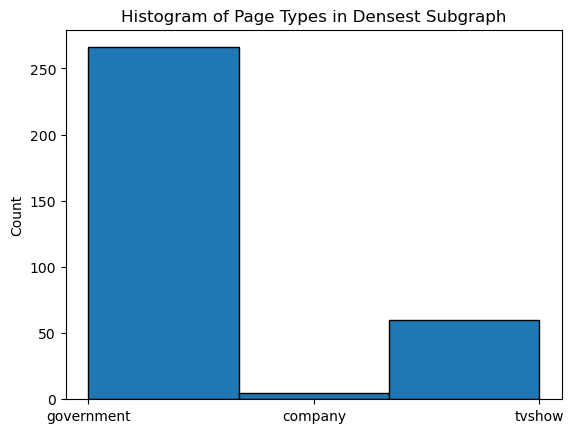

In [10]:
import matplotlib.pyplot as plt
densest_subgraph=list(best_subgraph.keys())
page_types = [df.at[i, "page_type"] for i in densest_subgraph]

plt.hist(page_types, bins=len(set(page_types)), edgecolor='black')
plt.ylabel("Count")
plt.title("Histogram of Page Types in Densest Subgraph")
plt.show()


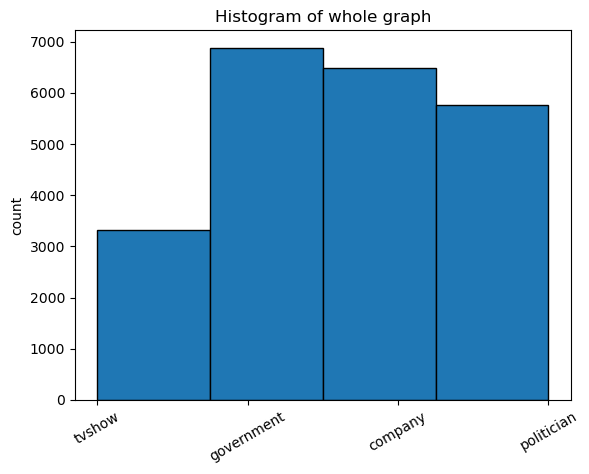

In [11]:
plt.hist(list(df["page_type"]),bins=4,edgecolor='black')
plt.title("Histogram of whole graph")
plt.ylabel("count")
plt.xticks(rotation=30)
plt.show()

Comments on histograms of whole graph and histogram of densest subgraph:

The densest subgraph is mostly made up of government-type nodes, which makes sense since they are the most common in the whole graph. But what's surprising is that there are no politician nodes in the densest subgraph,which is counterintuitive as they should be closely linked to government pages. Meanwhile, TV show nodes, which are the least frequent overall, make up a noticeable part of the densest subgraph (around one-sixth), meaning they have strong internal connections, which is somewhat unexpected. Company and politician nodes are fairly balanced in the whole graph, but that pattern doesn’t carry over to the densest subgraph. This shows that the densest part of the network isn’t just a smaller version of the full graph

## Question-2:
 Consider the email communication dataset linked here. Use it as an undirected network. Nodes are tagged
 with departments. Consider each department as a set and calculate both its density and conductance.
 Find out the sparsest cut as given by the second eigenvector of the normalized Laplacian and report its
 conductance. Also report the histogram of departments in the sparsest cut.

In [12]:
dept_labels=pd.read_csv("email-Eu-core-department-labels.txt\email-Eu-core-department-labels.txt", delimiter=" ",names=["id","dept"], header=None)
edges=pd.read_csv("email-Eu-core.txt\email-Eu-core.txt",delimiter=" ",names=["id_1","id_2"], header=None)

display(dept_labels)

display(edges)

,id,dept
0,0,1
1,1,1
2,2,21
3,3,21
4,4,21
...,...,...
1000,1000,4
1001,1001,21
1002,1002,1
1003,1003,6


,id_1,id_2
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [14]:
from collections import defaultdict
adj_list= defaultdict(set)

for i, j in zip(edges["id_1"], edges["id_2"]):
    adj_list[i].add(j)
    adj_list[j].add(i)

total_degree=sum(len(adj_list[i]) for i in adj_list)
node_to_label = dict(zip(dept_labels["id"], dept_labels["dept"]))  #mapping of node ID to department label

# Grouping nodes by department
dept_nodes = defaultdict(set)

for node, label in node_to_label.items():
    dept_nodes[label].add(node)
print("total degree is :",total_degree)

total degree is : 32770


In [15]:
def density(dept_nodes, adj_list):
    densities = {}
    for label, nodes in dept_nodes.items():
        n = len(nodes)
        if n < 2:
            densities[label] = 0  
            continue
        actual_edges = sum(1 for u in nodes for v in adj_list[u] if v in nodes) 
        actual_edges=actual_edges//2  #we should divide by 2 as the edges will be counted twice
        densities[label] = actual_edges / n
    
    return densities

densities = density(dept_nodes, adj_list)

def conductance(dept_nodes, adj_list):
    conductances = {}
    for label, nodes in dept_nodes.items():
        internal_edges = sum(1 for u in nodes for v in adj_list[u] if v in nodes) / 2
        external_edges = sum(1 for u in nodes for v in adj_list[u] if v not in nodes)

        total_degree_S = internal_edges*2 + external_edges
        conductances[label] = external_edges / min(total_degree- total_degree_S, total_degree_S)
    
    return conductances

conductances = conductance(dept_nodes, adj_list)


In [16]:
print(densities)

{1: 5.369230769230769, 21: 6.131147540983607, 25: 3.0, 14: 10.880434782608695, 9: 3.03125, 26: 2.3333333333333335, 4: 7.146788990825688, 17: 7.628571428571429, 34: 2.076923076923077, 11: 7.482758620689655, 5: 5.388888888888889, 10: 7.897435897435898, 36: 5.954545454545454, 37: 4.266666666666667, 7: 8.882352941176471, 22: 3.04, 8: 4.7894736842105265, 15: 4.5636363636363635, 3: 2.8333333333333335, 29: 0.6, 20: 3.142857142857143, 16: 6.2, 38: 2.4615384615384617, 27: 0.3, 13: 6.615384615384615, 6: 0.9285714285714286, 0: 5.653061224489796, 28: 1.625, 2: 2.7, 40: 1.75, 35: 3.076923076923077, 23: 1.0, 19: 6.689655172413793, 24: 0.5, 32: 2.0, 31: 0.125, 39: 0.3333333333333333, 12: 1.3333333333333333, 30: 0.75, 41: 0.0, 18: 0, 33: 0}


In [17]:
print(conductances)

{1: 0.5816876122082585, 21: 0.546060606060606, 25: 0.9302325581395349, 14: 0.29507042253521126, 9: 0.7078313253012049, 26: 0.9296235679214403, 4: 0.5480127647229475, 17: 0.4006734006734007, 34: 0.9426485922836287, 11: 0.5724137931034483, 5: 0.7424042272126816, 10: 0.5865771812080537, 36: 0.903070662227155, 37: 0.7645985401459854, 7: 0.4298300818124607, 22: 0.8055908513341804, 8: 0.6996699669966997, 15: 0.6482130343377716, 3: 0.7748344370860927, 29: 0.9435483870967742, 20: 0.8339622641509434, 16: 0.48929159802306427, 38: 0.8851590106007067, 27: 0.9567901234567902, 13: 0.6963812886142984, 6: 0.8761904761904762, 0: 0.5440329218106996, 28: 0.9150326797385621, 2: 0.7577092511013216, 40: 0.9044585987261147, 35: 0.89501312335958, 23: 0.8729411764705882, 19: 0.5460910151691949, 24: 0.9027777777777778, 32: 0.896358543417367, 31: 0.9857142857142858, 39: 0.9651162790697675, 12: 0.9021739130434783, 30: 0.8285714285714286, 41: 0.9333333333333333, 18: 1.0, 33: 1.0}


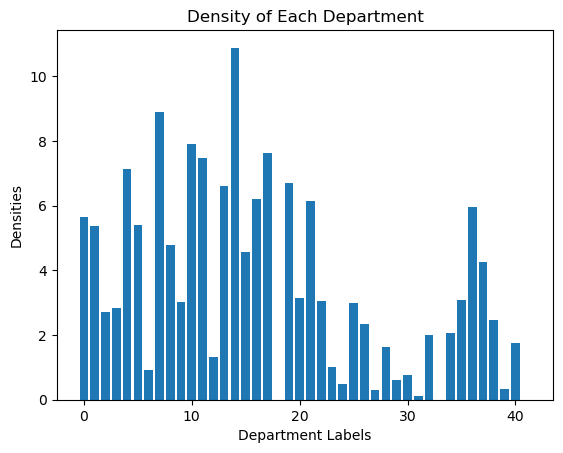

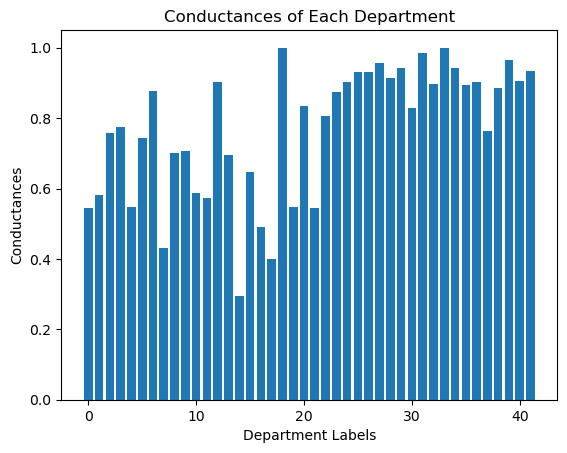

In [18]:
import matplotlib.pyplot as plt
plt.bar(densities.keys(), densities.values())
plt.xlabel("Department Labels")
plt.ylabel("Densities")
plt.title("Density of Each Department")
plt.show()

plt.bar(conductances.keys(), conductances.values())
plt.xlabel("Department Labels")
plt.ylabel("Conductances")
plt.title("Conductances of Each Department")
plt.show()


In [24]:
#for the sparsest cut part, first we have to find out the largest connected subgraph, we can do this by bfs and make note of largest subgraph until all nodes are visited
from collections import deque

def largest_connected_subgraph(graph):
    visited = set()
    largest_component = set()

    def bfs(start):
        queue = deque([start])
        component = set([start])
        visited.add(start)
        
        while queue:
            node = queue.popleft()
            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    component.add(neighbor)

        return component

    for node in graph:
        if node not in visited:
            component = bfs(node)
            if len(component) > len(largest_component):
                largest_component = component

    # Return subgraph as adjacency list
    largest_subgraph = {node: graph[node] & largest_component for node in largest_component}
    return largest_subgraph
largest_subgraph=largest_connected_subgraph(adj_list)


In [34]:
print((largest_subgraph).keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
from scipy.linalg import eigh

nodes_present = (largest_subgraph.keys())  
nodes_largest = len(nodes_present)

# Creating a mapping from old node indices to new compact indices
node_map = {old: new for new, old in enumerate(nodes_present)}

A = np.zeros((nodes_largest, nodes_largest))
D = np.zeros((nodes_largest, nodes_largest))

for old_i in largest_subgraph:
    new_i = node_map[old_i]  # Get the new index
    for old_j in largest_subgraph[old_i]:
        new_j = node_map[old_j]  # Get the new index
        A[new_i, new_j] = 1  # filling adjacency matrix
    D[new_i, new_i] = len(largest_subgraph[old_i])  # filling degree matrix

L = D - A
D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
L_norm = np.eye(nodes_largest) - D_inv_sqrt @ A @ D_inv_sqrt

# fiedler vector
eigenvalues, eigenvectors = eigh(L_norm)
fiedler = eigenvectors[:, np.argsort(eigenvalues)[1]]

threshold = np.median(fiedler)
S = np.where(fiedler > threshold)[0]
S_complement = np.where(fiedler <= threshold)[0]

edges_cut = [(i, j) for i in S for j in S_complement if A[i, j] > 0]
cut_edges_count = len(edges_cut)

deg_S = np.sum(D[S, S])
deg_S_complement = np.sum(D[S_complement, S_complement])
conductance = cut_edges_count / min(deg_S, deg_S_complement) if min(deg_S, deg_S_complement) > 0 else 0

print(f"Sparsest cut conductance: {conductance:.4f}")
print(f"Partition sizes: |S| = {len(S)}, |S_complement| = {len(S_complement)}")


Sparsest cut conductance: 0.4731
Partition sizes: |S| = 493, |S_complement| = 493


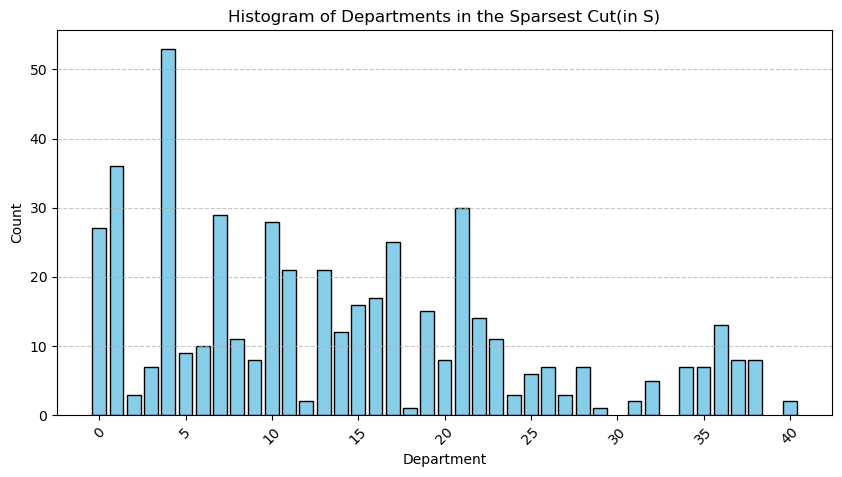

In [38]:
from collections import Counter
dept_S = list(dept_labels.at[i,"dept"] for i in S)
department_counts = Counter(dept_S)

labels, counts = zip(*sorted(department_counts.items(), key=lambda x: x[1], reverse=True))

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Histogram of Departments in the Sparsest Cut(in S)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



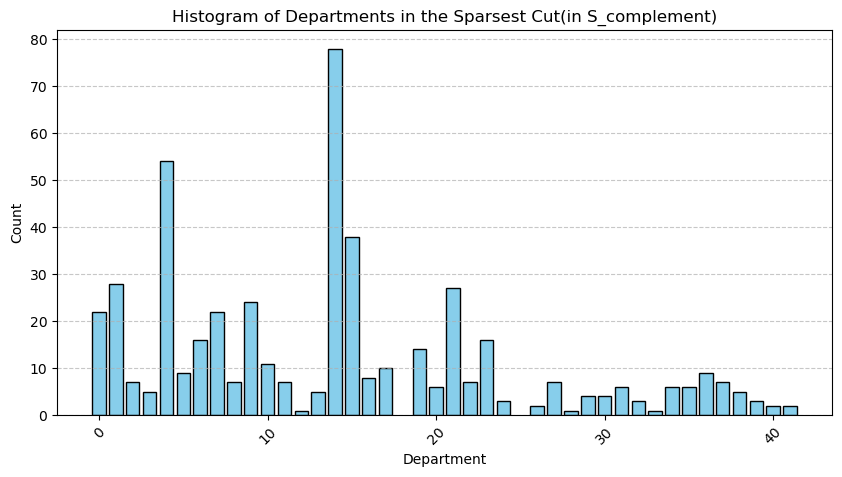

In [39]:
dept_S_bar = list(dept_labels.at[i,"dept"] for i in S_complement)

# Count occurrences of each department
department_counts_S_complement = Counter(dept_S_bar)

# Convert to sorted lists for plotting
labels, counts = zip(*sorted(department_counts_S_complement.items(), key=lambda x: x[1], reverse=True))

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Histogram of Departments in the Sparsest Cut(in S_complement)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Question-3:

 Create a 1-dimensional dataset in the following manner– pick 100 samples from each of following two
 Gaussians.

 (a) mean = 0, variance = 1.

 (b) mean = 3, variance = 1.
 
 Use sklearn’s implementation for kmeans. First try k-means on this data using k = 2. What are the
 centers? What fraction of points are correctly classified?
 Now, suppose we want to use distance rather than squared distance (i.e. k-median). Let us do an
 exhaustive search over all 2-clusterings (left s points in one cluster and rest 200 − s in the other cluster).
 Find the best one according to the k-median objective. What are the centers? Did distance work better
 or the squared distance?

In [106]:
from sklearn.cluster import KMeans
random.seed(10)
data_1 = np.random.normal(loc=0, scale=1, size=100)  
data_2 = np.random.normal(loc=3, scale=1, size=100)  
X = np.concatenate([data_1, data_2]).reshape(-1, 1)  


In [107]:

kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_.flatten()
labels = kmeans.labels_

cluster_for_data_1 = np.argmin(centroids)  
cluster_for_data_2 = np.argmax(centroids)  

correct_labels = ((labels[:100] == cluster_for_data_1).sum() + (labels[100:] == cluster_for_data_2).sum())
accuracy = correct_labels / 200

print("K-Means Centers:", centroids)
print(f"K-Means Accuracy: {accuracy*100}%")


K-Means Centers: [ 3.25765349 -0.08663297]
K-Means Accuracy: 93.0%


c:\Users\Eshwar\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
X_sorted = np.sort(X.flatten())

# Initialize best values
best_cost = float("inf")
best_medians = None

# Try all possible split points
for s in range(1, len(X_sorted)):  
    left_cluster = X_sorted[:s]
    right_cluster = X_sorted[s:]

    median_left = np.median(left_cluster)
    median_right = np.median(right_cluster)

    cost = np.sum(np.abs(left_cluster - median_left)) + np.sum(np.abs(right_cluster - median_right))

    if cost < best_cost:
        best_cost = cost
        best_split=s
        best_medians = (median_left, median_right)

print("Best k-Median Centers:", tuple(map(float, best_medians)))
print("Best k-Median Cost:", best_cost)


s = best_split
median_left, median_right = best_medians
kmedian_labels = np.zeros(200, dtype=int)
kmedian_labels[s:] = 1 

correct_labels_kmedian = (kmedian_labels[:100] == 0).sum() +(kmedian_labels[100:] == 1).sum()

kmedian_accuracy = correct_labels_kmedian / 200

print(f"K-Median Accuracy: {kmedian_accuracy*100}%")




Best k-Median Centers: (0.044092857226329926, 3.2085393504742834)
Best k-Median Cost: 155.62746392454528
K-Median Accuracy: 98.0%


observation:

K-median(98% accuracy) is working better than kmeans(93%  accuracy) in this case, distance as cost worked better than squared distance,

## Question-4:
Consider the following dataset and the query set. Implement a Bloom filter (m bits, k hash functions) for
answering the question of whether each of the queries are present in the data. For the k hash functions
use md5 with k different seeds and then take do a mod(·) to get a number in 0,m.
Fix the size of the BF to be m = 1024 bits. Do different implementations, one for each k ∈ {2,4,6,8,10,12}.
Plot the following– k (i.e. number of hash functions) vs the false positives. find out the optimal k for
your dataset and calculate the empirical false positive for that too.

In [117]:
import math, random, hashlib, string
n, fp, q = 10**6, 0.05, 5000
m = math.ceil(-(n*math.log(fp))/(math.log(2)**2))
rnd_str = lambda: ''.join(random.choices(string.ascii_letters+string.digits, k=100))
random.seed(11)
data = {rnd_str() for _ in range(n)}
pos_q = random.sample(list(data), q//2)
neg_q = [rnd_str() for _ in range(q//2)]
neg_set = set(neg_q)
hash_pos = lambda x,s: [int(hashlib.md5((str(i)+x).encode()).hexdigest(),16)%m for i in s]
k_vals, fp_rates = [2,4,6,8,10,12], []

for k in k_vals:
    bits, seeds = [0]*m, range(k)
    [bits.__setitem__(i,1) for x in data for i in hash_pos(x,seeds)]
    fpp = sum(all(bits[i]==1 for i in hash_pos(x,seeds)) for x in neg_set)/len(neg_set)
    fp_rates.append(fpp)
    print(f"k={k}, FPR={fpp:.4f}")

best_k = k_vals[fp_rates.index(min(fp_rates))]
print(f"\nOptimal k={best_k}, Min FPR={min(fp_rates):.4f}")


k=2, FPR=0.0768
k=4, FPR=0.0484
k=6, FPR=0.0636
k=8, FPR=0.0712
k=10, FPR=0.0992
k=12, FPR=0.1356

Optimal k=4, Min FPR=0.0484


m: 6235225


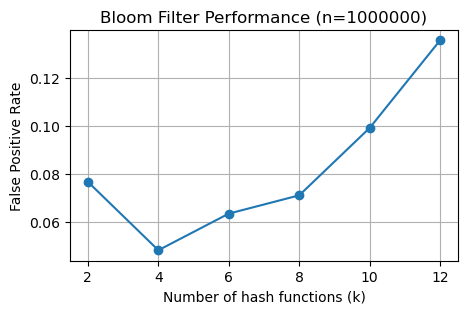

In [119]:
print("m:",m)
plt.figure(figsize=(5, 3))
plt.plot(k_vals, fp_rates, marker='o')
plt.xlabel('Number of hash functions (k)')
plt.ylabel('False Positive Rate')
plt.title(f'Bloom Filter Performance (n={n})')
plt.grid(True)
plt.show()